# Model Stacking Performance

This notebook shows performance of the models making up the stack as well as the overall stack.  Data for this work comes from Kaggle's [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management) competition.

The competiton required builiding a binary classification model.  Competitors's submissions were scored on the [logloss metric](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management#evaluation).

Note:
* The csv file was saved as an Excel workbook as part of testing.
* Public leaderboard scores were manually entered into the Excel workbook.
* Due to random number generation, values seen in this report may differ from values obtained by running the demonstration on another computer.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Model Stacking Architecture Concept



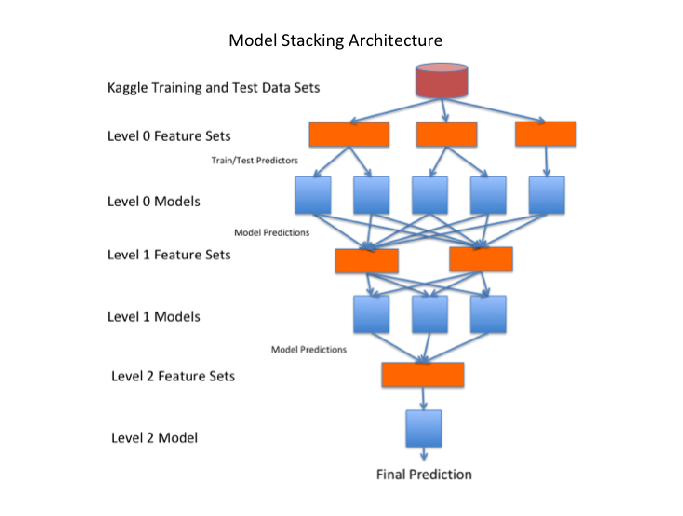

In [8]:
%matplotlib inline

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(12)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)

ms_pic = plt.imread('./model_stacking_architecture.png')
ax.imshow(ms_pic)


## Read in model performance data

In [3]:
model_performance = pd.read_excel('./model_performance_data.xls',sheet_name='model_performance')

## Performance of Models in the Stack

In [6]:
model_performance[['model_id','feature_set','public_leaderboard','cv_avg_metric']]\
    .sort_values(['public_leaderboard'],ascending=[True])

,model_id,feature_set,public_leaderboard,cv_avg_metric
1,L1NN1,L1FS01,0.45323,0.459475
0,L2NN1,L2FS01,0.45347,0.458241
2,L1RF1,L1FS01,0.45394,0.457973
3,L2RF1,L2FS01,0.46084,0.475821
4,L0XTC1,KFSBSLN,0.46410,0.475605
5,L0RF1,KFSBSLN,0.46863,0.472326
6,L0NN1,KFS03,0.47639,0.486694
7,L0LOG1,KFS04,0.48409,0.486056


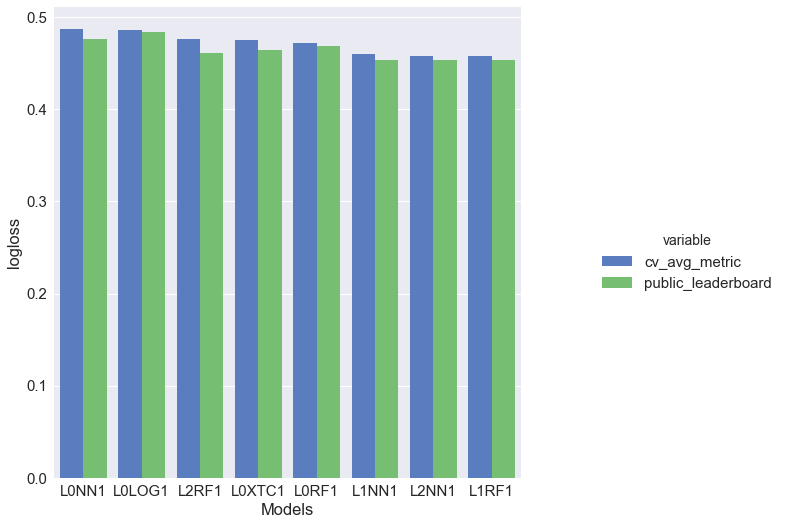

In [7]:
data_to_chart = pd.melt(model_performance,id_vars=['model_id'],
                        value_vars=['cv_avg_metric','public_leaderboard'])
data_to_chart.sort_values(['value','variable','model_id'],ascending=[False,False,True],inplace=True)



sns.set(font_scale=1.5)
g = sns.factorplot(x="model_id", y="value", hue="variable", data=data_to_chart,
                   hue_order=['cv_avg_metric','public_leaderboard'],
                   size=6, kind="bar", palette="muted")
g.set_ylabels("logloss")
g.set_xlabels('Models')
g.fig.set_figheight(8)
g.fig.set_figwidth(12)